In [1]:
# Import some minor things
import sys
sys.path.append('../')
from numpy import * # For math of course
import seaborn as sb # For nice data vis
import pandas as pd # For data stuff
from PyGMO import * # For optimisation
# Make sure the plots are vector graphics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Import some Astro.IQ things!
from Optimisation import HSS
from Trajectory import Point_Lander_Drag
from IQ import *

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Random Walk of Initial States

In [6]:
# Instantiate the model
model = Point_Lander_Drag()

In [3]:
# List of initial states
states = Random_Initial_States(model, mxstep=2., nstates=5000.)

../IQ.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  states = zeros((nstates, model.sdim))
../IQ.py:35: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  states[i] = states[i-1] + perturb
../IQ.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  badj = states[i] < silb
../IQ.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  states[i, badj] = states[i-1, badj] - 0.005*perturb[badj]
../IQ.py:38: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  badj = states[i] > siub
../IQ.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  states[i, badj] = states[i-1, badj] - 0.005*pert

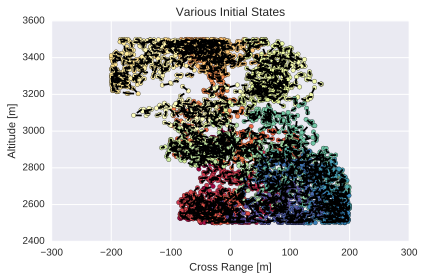

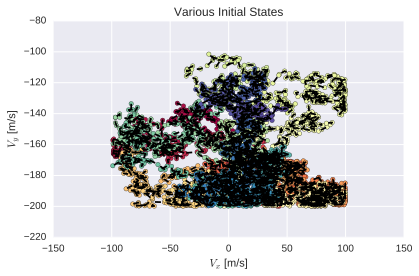

In [5]:
# Visualise the initial states
plt.close('all')
plt.plot(states[:,0], states[:,1], 'k--')
plt.scatter(states[:,0], states[:,1], c=range(len(states)), cmap=plt.cm.get_cmap("Spectral"))
#plt.axes().set_aspect('equal', 'datalim')
plt.xlabel("Cross Range [m]")
plt.ylabel("Altitude [m]")
plt.title("Various Initial States")
plt.tight_layout()
plt.savefig("../Data/Figs/Mars_Init_States_r.svg", format='svg',transparent=True, bbox_inches='tight')
plt.show()
plt.plot(states[:,2], states[:,3], 'k--')
plt.scatter(states[:,2], states[:,3], c=range(len(states)), cmap=plt.cm.get_cmap("Spectral"))
#plt.axes().set_aspect('equal', 'datalim')
plt.xlabel("$V_x$ [m/s]")
plt.ylabel("$V_y$ [m/s]")
plt.title("Various Initial States")
plt.tight_layout()
plt.savefig("../Data/Figs/Mars_Init_States_v.svg", format='svg',transparent=True, bbox_inches='tight')
plt.show()

In [5]:
# Save the states so we can optimise several trajectories!
save('../Data/Point_Lander_Mars_Initial_States', states)